In [3]:
# Install missing packages (run once in the notebook)
# Use IPython's %pip magic so the commands run correctly inside the notebook cell
%pip install xgboost lightgbm catboost -q

#Import the necessary libraries
import pandas as pd # Loading dataset
import numpy as np #Perform numerical calculations
import matplotlib.pyplot as plt #Python visualizations
import seaborn as sns #Statistical visualizations
from scipy import stats #Statistical inferencing
from statsmodels.stats.outliers_influence import variance_inflation_factor #Checking for multicollinearity
from statsmodels.tools.tools import add_constant #Adding y-intercept to our model
from statsmodels.formula.api import ols #Linear Regression
import statsmodels.api as sm #ANOVA/ F-Statistic
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler #Preprocessing data before ML
from sklearn.model_selection import train_test_split, GridSearchCV #split our data, get the best model parameters
from sklearn.linear_model import LinearRegression, Ridge, Lasso #Linear Regression
from sklearn.tree import DecisionTreeRegressor #Tree model
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor #Ensembling model
# sklearn.metrics does not provide root_mean_squared_error in many versions; compute RMSE with numpy.sqrt if needed
from sklearn.metrics import mean_squared_error, r2_score #Model evaluators
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

Note: you may need to restart the kernel to use updated packages.


XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <B111F8D5-6AC6-3245-A6B5-94693F6992AB> /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]


In [ ]:
#Load a dataset
house_prices_data = pd.read_csv(r"house_prices_dataset.csv")
house_prices_data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,year_built,year_renovated,zipcode,lat,long,price
0,3,1,2803,1153,1,0,0,3,9,2003,0,98001,47.660671,-121.785347,835016.23
1,5,3,783,9762,1,0,2,4,4,2019,0,98003,47.681937,-122.151515,326073.09
2,3,3,3412,2842,2,0,3,4,9,1961,1962,98002,47.182798,-121.792089,1025404.09
3,2,3,2222,9020,2,1,2,4,4,2008,1962,98004,47.440995,-121.871224,758764.79
4,4,1,4713,1584,2,0,3,4,5,1987,0,98005,47.701306,-122.416623,1314784.23


In [ ]:
house_prices_data["waterfront"].value_counts()

waterfront
0    893
1    107
Name: count, dtype: int64

In [ ]:
house_prices_data["view"].value_counts()

view
1    265
0    259
3    250
2    226
Name: count, dtype: int64

In [ ]:
house_prices_data["condition"].value_counts()

condition
5    216
2    207
4    199
1    190
3    188
Name: count, dtype: int64

In [ ]:
house_prices_data["grade"].value_counts()

grade
12    111
1      95
3      91
10     90
8      86
4      85
9      80
5      80
6      76
11     75
7      72
2      59
Name: count, dtype: int64

In [ ]:
#Drop the zipcode column
house_prices_data = house_prices_data.drop('zipcode',axis=1)
house_prices_data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,year_built,year_renovated,lat,long,price
0,3,1,2803,1153,1,0,0,3,9,2003,0,47.660671,-121.785347,835016.23
1,5,3,783,9762,1,0,2,4,4,2019,0,47.681937,-122.151515,326073.09
2,3,3,3412,2842,2,0,3,4,9,1961,1962,47.182798,-121.792089,1025404.09
3,2,3,2222,9020,2,1,2,4,4,2008,1962,47.440995,-121.871224,758764.79
4,4,1,4713,1584,2,0,3,4,5,1987,0,47.701306,-122.416623,1314784.23


In [ ]:
#More information about our dataset, .info method
house_prices_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedrooms        1000 non-null   int64  
 1   bathrooms       1000 non-null   int64  
 2   sqft_living     1000 non-null   int64  
 3   sqft_lot        1000 non-null   int64  
 4   floors          1000 non-null   int64  
 5   waterfront      1000 non-null   int64  
 6   view            1000 non-null   int64  
 7   condition       1000 non-null   int64  
 8   grade           1000 non-null   int64  
 9   year_built      1000 non-null   int64  
 10  year_renovated  1000 non-null   int64  
 11  lat             1000 non-null   float64
 12  long            1000 non-null   float64
 13  price           1000 non-null   float64
dtypes: float64(3), int64(11)
memory usage: 109.5 KB


#### Exploratory Data Analysis
- Price Distribution
- Does the number of floors influence the price?
- Waterfront distribution against the price
- Does the year that a house was built affect the price?

In [ ]:
#General Statistics
house_prices_data.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,year_built,year_renovated,lat,long,price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2.988000,2.038000,2792.998000,5447.602000,1.501000,0.107000,1.467000,3.044000,6.651000,1985.746000,431.076000,47.443683,-122.009919,8.358796e+05
std,1.412746,0.819285,1288.747969,2614.572404,0.500249,0.309268,1.126135,1.424814,3.548773,20.809385,819.312098,0.198316,0.292534,3.271162e+05
min,1.000000,1.000000,600.000000,1001.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1950.000000,0.000000,47.100252,-122.497067,2.075845e+05
25%,2.000000,1.000000,1652.750000,3103.500000,1.000000,0.000000,0.000000,2.000000,4.000000,1968.000000,0.000000,47.275159,-122.259953,5.527969e+05
50%,3.000000,2.000000,2787.500000,5464.500000,2.000000,0.000000,1.000000,3.000000,7.000000,1986.000000,0.000000,47.450923,-122.024822,8.460296e+05
75%,4.000000,3.000000,3921.500000,7754.500000,2.000000,0.000000,2.250000,4.000000,10.000000,2004.000000,0.000000,47.609755,-121.748543,1.131182e+06
max,5.000000,3.000000,4996.000000,9992.000000,2.000000,1.000000,3.000000,5.000000,12.000000,2021.000000,2021.000000,47.798749,-121.500636,1.476859e+06


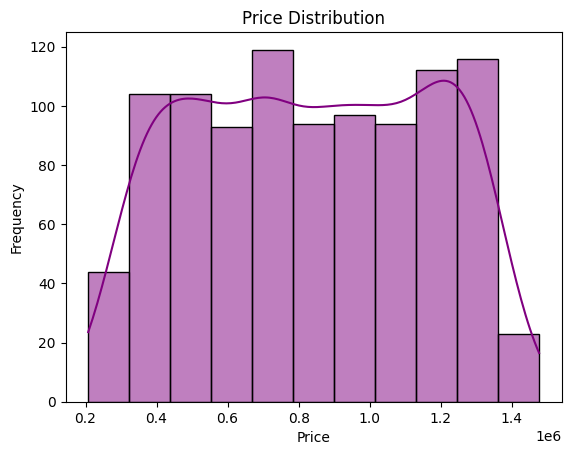

In [ ]:
#Price Distribution
sns.histplot(data=house_prices_data,x="price", color = "purple", kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

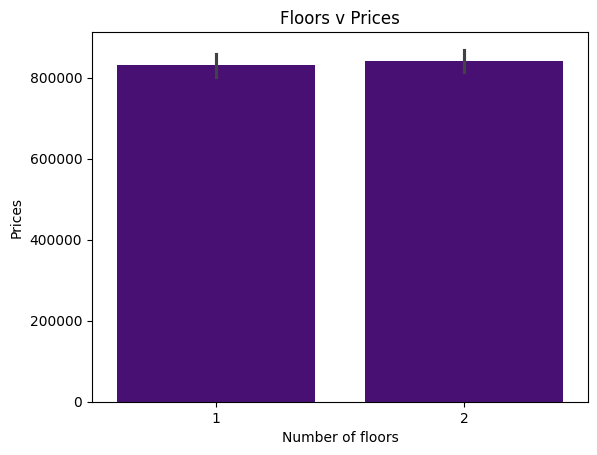

In [ ]:
sns.barplot(data= house_prices_data, x ='floors', y= 'price', color= 'indigo')
plt.title("Floors v Prices")
plt.xlabel("Number of floors")
plt.ylabel("Prices")
plt.show()

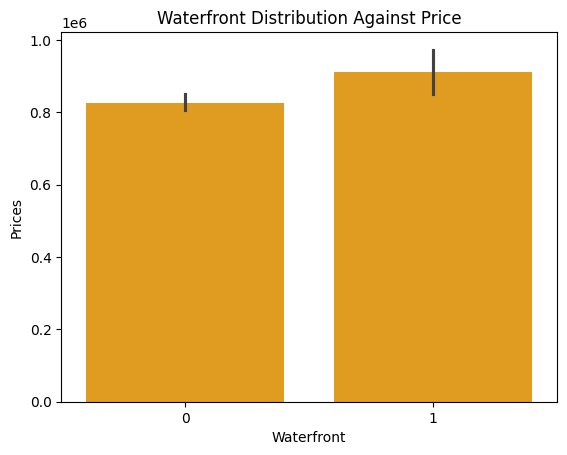

In [ ]:
sns.barplot(data= house_prices_data, x ='waterfront', y= 'price', color= 'orange')
plt.title("Waterfront Distribution Against Price")
plt.xlabel("Waterfront")
plt.ylabel("Prices")
plt.show()

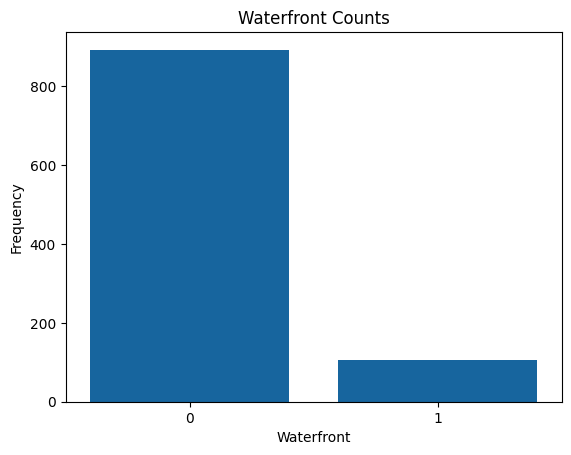

In [ ]:
sns.countplot(data = house_prices_data, x = 'waterfront', color = "#0069b4")
plt.title("Waterfront Counts")
plt.xlabel("Waterfront")
plt.ylabel("Frequency")
plt.show()

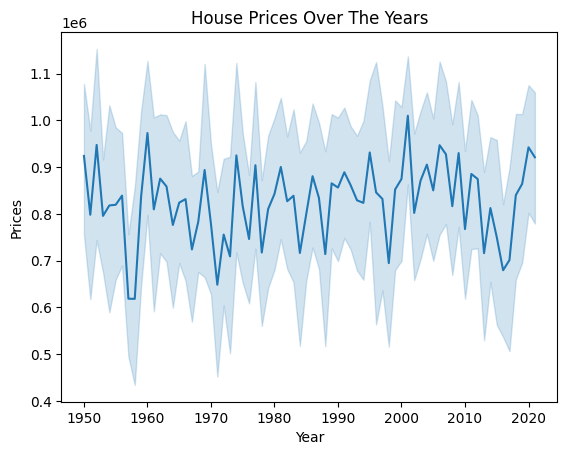

In [ ]:
sns.lineplot(data = house_prices_data, x= "year_built", y = "price")
plt.title("House Prices Over The Years")
plt.xlabel("Year")
plt.ylabel("Prices")
plt.show()

#### Correlation Analysis
- Relationship between the independent variables and the dependent variable.
- Interpreting correlation:
    - Perfect correlation = 1
    - No correlation = 0
    - Strong positive correlation btn 0.5 and 1
    - Strong negative correlation btn -0.5 and -1
    - Weak positive correlation btn 0.1 and 0.5
    - Weak negative correlation btn -0.1 and -0.5

In [ ]:
#Pearson's correlation
correlations = house_prices_data.corr()
print(correlations)

                bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
bedrooms        1.000000  -0.003930    -0.020278 -0.028367 -0.015563   
bathrooms      -0.003930   1.000000     0.030190  0.002061  0.043870   
sqft_living    -0.020278   0.030190     1.000000 -0.014612  0.008787   
sqft_lot       -0.028367   0.002061    -0.014612  1.000000  0.014753   
floors         -0.015563   0.043870     0.008787  0.014753  1.000000   
waterfront      0.044181   0.051097    -0.017256 -0.002951  0.041364   
view            0.009189   0.048013     0.055540 -0.100164  0.046257   
condition      -0.016148   0.049160     0.024721  0.021185 -0.007084   
grade           0.015536  -0.011960     0.004750  0.007995  0.029799   
year_built     -0.028739   0.012309     0.040945  0.013263 -0.010553   
year_renovated -0.049568  -0.018157    -0.024732  0.033545 -0.017841   
lat             0.036425  -0.012870    -0.038860 -0.019825 -0.021462   
long           -0.014820  -0.009914    -0.017699  0.135227  0.01

<Axes: >

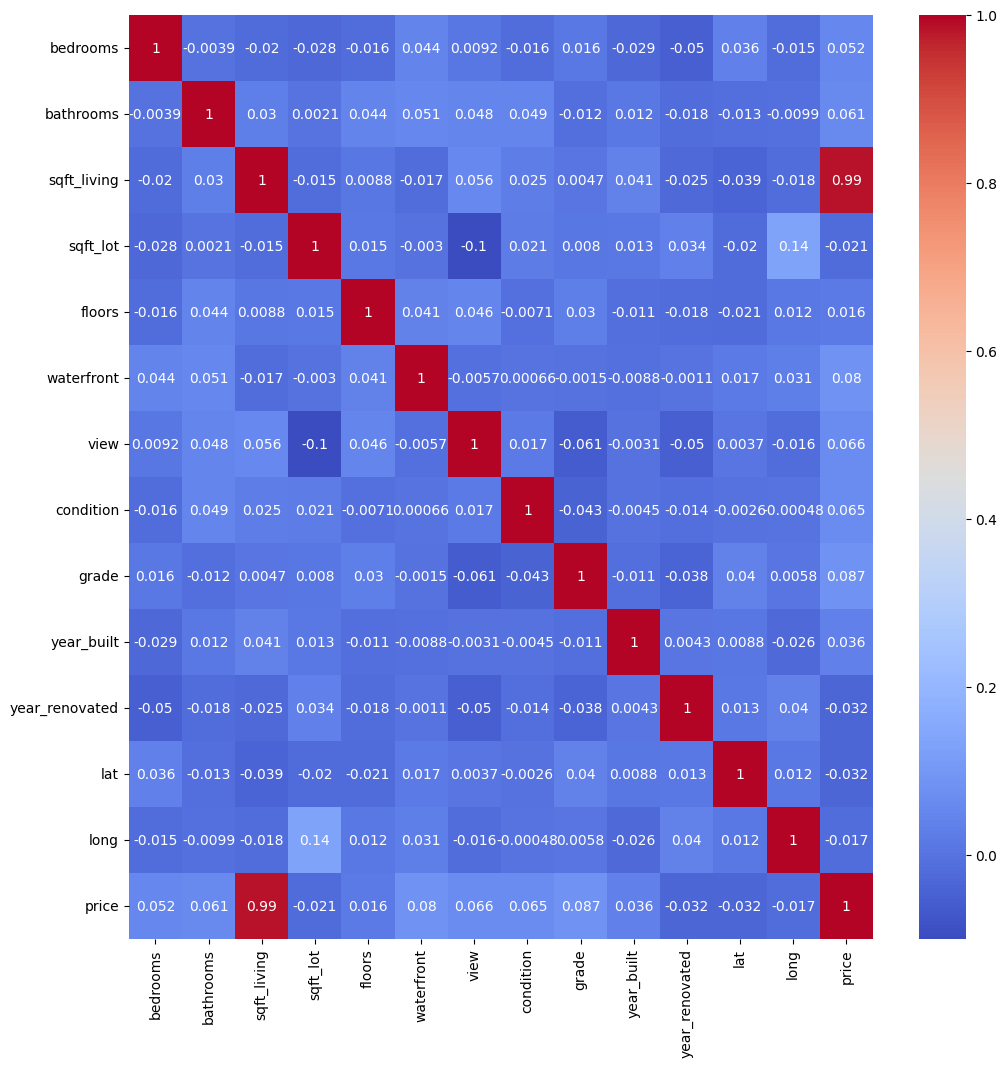

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(12,12))
sns.heatmap(data=correlations, cmap= "coolwarm", annot=True)

#### VIF
- This can be used to check for multicollinearity.
- Multicollinearity - Correlation between independent variables.

In [ ]:
#Extract the independent and dependent variables
y = house_prices_data['price']
x = house_prices_data.drop('price', axis = 1)

In [ ]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,year_built,year_renovated,lat,long
0,3,1,2803,1153,1,0,0,3,9,2003,0,47.660671,-121.785347
1,5,3,783,9762,1,0,2,4,4,2019,0,47.681937,-122.151515
2,3,3,3412,2842,2,0,3,4,9,1961,1962,47.182798,-121.792089
3,2,3,2222,9020,2,1,2,4,4,2008,1962,47.440995,-121.871224
4,4,1,4713,1584,2,0,3,4,5,1987,0,47.701306,-122.416623


In [ ]:
#Variance Inflation Factor
x = add_constant(x)

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                   for i in range(x.shape[1])]

print(vif_data)

           Feature            VIF
0            const  245124.428644
1         bedrooms       1.008525
2        bathrooms       1.010433
3      sqft_living       1.009111
4         sqft_lot       1.031680
5           floors       1.008315
6       waterfront       1.008007
7             view       1.024047
8        condition       1.006046
9            grade       1.010532
10      year_built       1.004037
11  year_renovated       1.010107
12             lat       1.006233
13            long       1.022586


#### ANOVA (F-Statistic)
- Hypothesis testing
- Checking for significance of the independent variables with relation to the dependent variable
- OLS to fit our model and get the f-statistic

In [ ]:
formula = "price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + year_built + year_renovated + lat + long + C(waterfront) + C(view) + C(condition) + C(grade)"
lm = ols(formula=formula, data= house_prices_data).fit()
table = sm.stats.anova_lm(lm,typ=2)
print(table)

                      sum_sq     df              F         PR(>F)
C(waterfront)   9.162279e+11    1.0    2418.866823  7.457463e-266
C(view)         1.778235e+10    3.0      15.648635   6.044636e-10
C(condition)    2.041271e+11    4.0     134.725264   1.434478e-91
C(grade)        7.618510e+11   11.0     182.846151  1.027685e-227
bedrooms        4.706348e+11    1.0    1242.488860  6.210838e-176
bathrooms       6.155457e+10    1.0     162.505755   1.583377e-34
sqft_living     1.014352e+14    1.0  267791.853653   0.000000e+00
sqft_lot        1.929970e+09    1.0       5.095173   2.421403e-02
floors          3.847932e+07    1.0       0.101586   7.500026e-01
year_built      4.748860e+06    1.0       0.012537   9.108709e-01
year_renovated  1.106572e+08    1.0       0.292138   5.889776e-01
lat             1.171190e+08    1.0       0.309198   5.783011e-01
long            1.535702e+06    1.0       0.004054   9.492434e-01
Residual        3.677992e+11  971.0            NaN            NaN


In [ ]:
house_prices_data["year_renovated"].value_counts()

year_renovated
0       783
1970      8
1993      8
1998      6
1962      6
       ... 
2010      1
2013      1
1956      1
1954      1
1987      1
Name: count, Length: 70, dtype: int64

In [ ]:
#First convert the date to datetime
#house_prices_data["year_renovated"]= pd.to_datetime(house_prices_data["year_renovated"])
#house_prices_data.info()

In [ ]:
#Feature engineer years since renovation from the year renovated column
current_year = pd.Timestamp.now().year

house_prices_data["years since renovation"]= current_year - house_prices_data["year_renovated"]

house_prices_data["years since renovation"] = house_prices_data['years since renovation'].where(house_prices_data['year_renovated'] > 0, 0)
house_prices_data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,year_built,year_renovated,lat,long,price,years since renovation
0,3,1,2803,1153,1,0,0,3,9,2003,0,47.660671,-121.785347,835016.23,0
1,5,3,783,9762,1,0,2,4,4,2019,0,47.681937,-122.151515,326073.09,0
2,3,3,3412,2842,2,0,3,4,9,1961,1962,47.182798,-121.792089,1025404.09,63
3,2,3,2222,9020,2,1,2,4,4,2008,1962,47.440995,-121.871224,758764.79,63
4,4,1,4713,1584,2,0,3,4,5,1987,0,47.701306,-122.416623,1314784.23,0


In [ ]:
house_prices_data["year_renovated"].value_counts()

year_renovated
0       783
1970      8
1993      8
1998      6
1962      6
       ... 
2010      1
2013      1
1956      1
1954      1
1987      1
Name: count, Length: 70, dtype: int64

<Axes: >

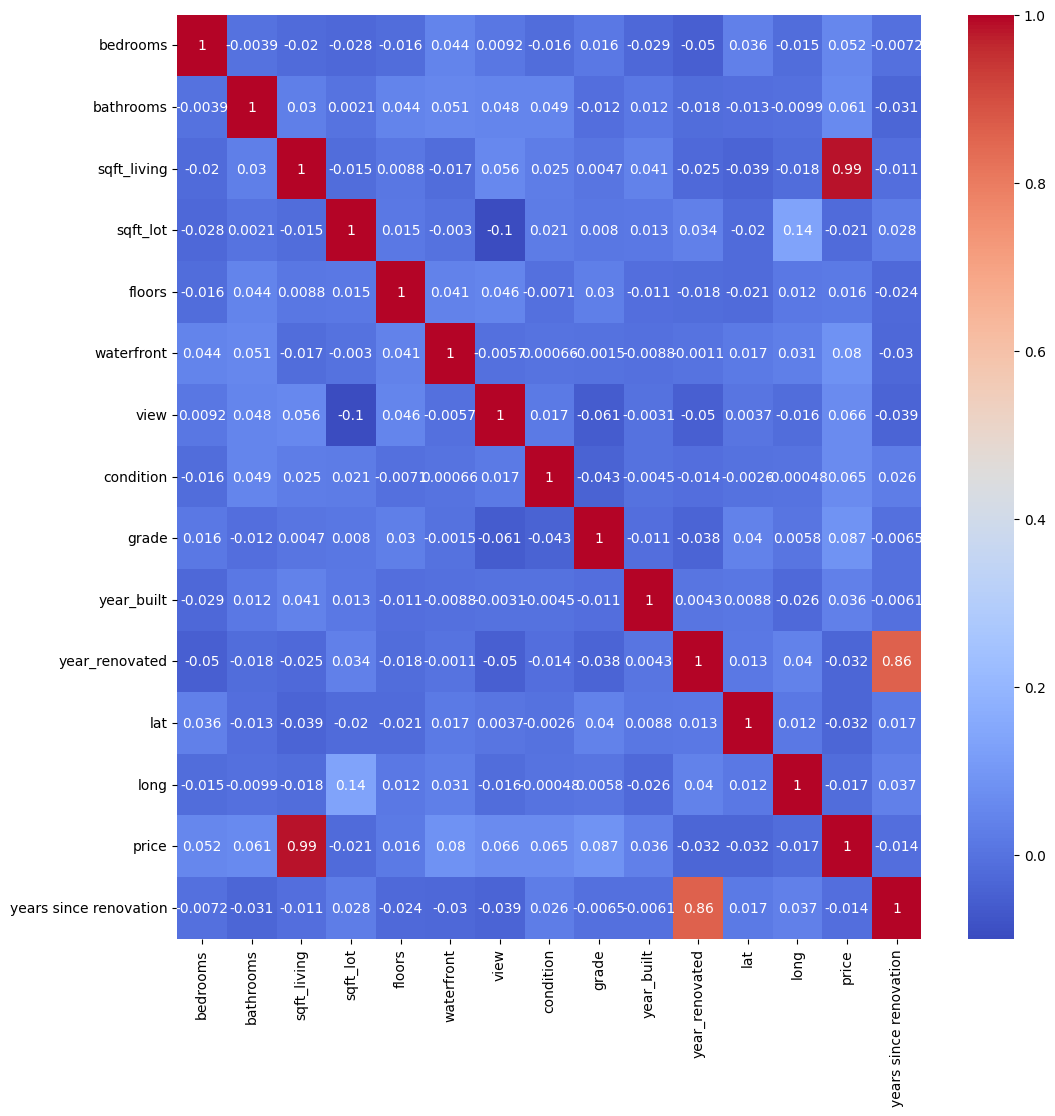

In [ ]:
correlations1 = house_prices_data.corr()
#Correlation Heatmap
plt.figure(figsize=(12,12))
sns.heatmap(data=correlations1, cmap= "coolwarm", annot=True)

In [ ]:
#Variance Inflation Factor
x= house_prices_data.drop('price', axis = 1)
x = add_constant(x)

# Compute VIF to check for multicollinearity
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                   for i in range(x.shape[1])]

print(vif_data)

                   Feature            VIF
0                    const  245129.128832
1                 bedrooms       1.013823
2                bathrooms       1.011420
3              sqft_living       1.009564
4                 sqft_lot       1.031680
5                   floors       1.008520
6               waterfront       1.011411
7                     view       1.024152
8                condition       1.012444
9                    grade       1.013428
10              year_built       1.004342
11          year_renovated       3.926888
12                     lat       1.006288
13                    long       1.022625
14  years since renovation       3.913710


In [ ]:
x = x.drop('year_renovated', axis =1)

# Compute VIF to check for multicollinearity
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                   for i in range(x.shape[1])]

print(vif_data)

                   Feature            VIF
0                    const  245112.406652
1                 bedrooms       1.006154
2                bathrooms       1.011025
3              sqft_living       1.008733
4                 sqft_lot       1.031534
5                   floors       1.008497
6               waterfront       1.008859
7                     view       1.023083
8                condition       1.006595
9                    grade       1.008901
10              year_built       1.004057
11                     lat       1.006286
12                    long       1.022462
13  years since renovation       1.006717


/var/folders/rh/hmsgqjcd7ql0d_4ksg2_k9t40000gn/T/ipykernel_61931/71638438.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Variable', y='Value', data=house_prices_melted, palette='coolwarm')


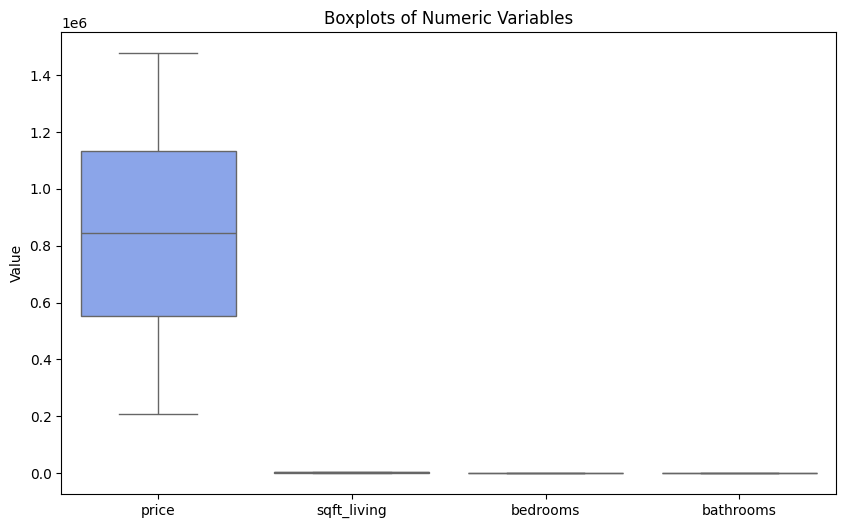

In [ ]:
numeric_cols = ['price', 'sqft_living', 'bedrooms', 'bathrooms']

# Melt data into long format
house_prices_melted = house_prices_data[numeric_cols].melt(var_name='Variable', value_name='Value')

# Plot all boxplots in one chart
plt.figure(figsize=(10, 6))
sns.boxplot(x='Variable', y='Value', data=house_prices_melted, palette='coolwarm')
plt.title('Boxplots of Numeric Variables')
plt.xlabel('')
plt.ylabel('Value')
plt.show()

/var/folders/rh/hmsgqjcd7ql0d_4ksg2_k9t40000gn/T/ipykernel_61931/318656330.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Variable', y='Scaled Value', data=scaled_melted, palette='viridis')


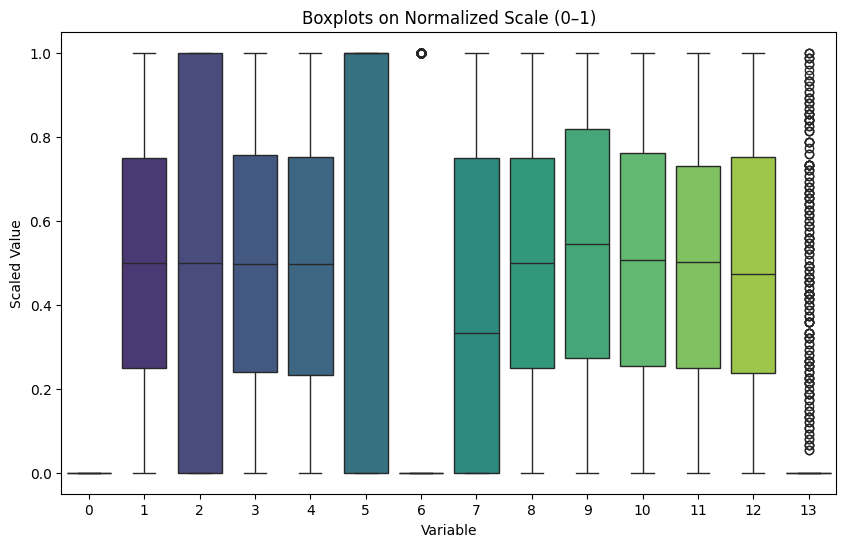

In [ ]:
min_max_scaler = MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(x)
scaled_df = pd.DataFrame(data_scaled)
scaled_melted = scaled_df.melt(var_name='Variable', value_name='Scaled Value') 

plt.figure(figsize=(10, 6))
sns.boxplot(x='Variable', y='Scaled Value', data=scaled_melted, palette='viridis')
plt.title('Boxplots on Normalized Scale (0–1)')
plt.show()

In [ ]:
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.50,0.0,0.501137,0.016906,0.0,0.0,0.000000,0.50,0.727273,0.746479,0.802321,0.714269,0.00
1,0.0,1.00,1.0,0.041629,0.974419,0.0,0.0,0.666667,0.75,0.272727,0.971831,0.832767,0.346790,0.00
2,0.0,0.50,1.0,0.639672,0.204760,1.0,0.0,1.000000,0.75,0.727273,0.154930,0.118177,0.707503,0.84
3,0.0,0.25,1.0,0.368972,0.891892,1.0,1.0,0.666667,0.75,0.272727,0.816901,0.487823,0.628085,0.84
4,0.0,0.75,0.0,0.935623,0.064843,1.0,0.0,1.000000,0.75,0.363636,0.521127,0.860496,0.080732,0.00


In [ ]:
price_normalized = np.log(y)
y_transformed = pd.Series(price_normalized)
print(y_transformed)

0      13.635206
1      12.694877
2      13.840597
3      13.539447
4      14.089183
         ...    
995    13.453856
996    13.994396
997    13.443744
998    12.987000
999    12.420902
Name: price, Length: 1000, dtype: float64


In [ ]:
model = sm.OLS(price_normalized, scaled_df).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              2193.
Date:                Thu, 30 Oct 2025   Prob (F-statistic):                        0.00
Time:                        10:14:37   Log-Likelihood:                         -2326.9
No. Observations:                1000   AIC:                                      4680.
Df Residuals:                     987   BIC:                                      4744.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(scaled_df, price_normalized, test_size=0.2, random_state=42)

# ==============================================
# Define models
# ==============================================
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.001),
    "Decision Tree": DecisionTreeRegressor(max_depth=6, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, verbosity=0),
    "LightGBM": LGBMRegressor(n_estimators=200, learning_rate=0.1, random_state=42, verbose=-1),
    "CatBoost": CatBoostRegressor(iterations=200, learning_rate=0.1, depth=6, silent=True, random_state=42)
}

# ==============================================
# Train & evaluate each model
# ==============================================
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "RMSE": rmse,
        "R²": r2
    })

# ==============================================
# Results comparison
# ==============================================
results_df = pd.DataFrame(results).sort_values(by="RMSE")
print(results_df)

NameError: name 'XGBRegressor' is not defined

In [ ]:
# Upgrade pip inside the notebook (use IPython magic so it runs correctly in this cell)
%pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 2.7 MB/s  0:00:01 eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 25.2
    Uninstalling pip-25.2:
      Successfully uninstalled pip-25.2
Note: you may need to restart the kernel to use updated packages.
